In [18]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
from pandas_datareader import data


In [2]:
# Define variables
fast_ma = 50
slow_ma = 100
starting_balance = 10000

In [3]:
# Set the file path
spy_data = Path("hanna/SPY.csv")

In [4]:
# Reading spy returns
# Read the CSV and set the 'Date' column as a datetime index to the DataFrame
spy_df = pd.read_csv(spy_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Sort datetime index in ascending order (past to present)
spy_df = spy_df.sort_index()

# Display a few rows from the DataFrame
spy_df.head()

,Close
Date,
1999-01-04 16:00:00,123.03
1999-01-05 16:00:00,124.44
1999-01-06 16:00:00,127.44
1999-01-07 16:00:00,126.81
1999-01-08 16:00:00,127.75


In [5]:
# Count nulls
spy_df.isnull().sum()

Close    0
dtype: int64

In [6]:
# Drop nulls
spy_df = spy_df.dropna()

In [7]:
# Validate no more missing values
spy_df.isnull().sum()

Close    0
dtype: int64

In [8]:
# Check Data Types
spy_df.dtypes

Close    float64
dtype: object

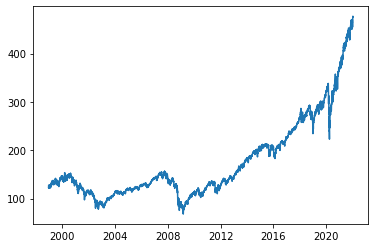

In [9]:
# Since the Close column is already a type float64, then the data is clean and good to use for analysis.
# Plot close values chart for exploration purposes
plt.plot(spy_df.Close)
plt.show()

In [10]:
# Calculate Daily Returns
spy_returns = spy_df.pct_change()
spy_returns.head()

,Close
Date,
1999-01-04 16:00:00,NaN
1999-01-05 16:00:00,0.011461
1999-01-06 16:00:00,0.024108
1999-01-07 16:00:00,-0.004944
1999-01-08 16:00:00,0.007413


In [11]:
# Drop nulls
spy_returns = spy_returns.dropna()

In [12]:
spy_returns.head()

,Close
Date,
1999-01-05 16:00:00,0.011461
1999-01-06 16:00:00,0.024108
1999-01-07 16:00:00,-0.004944
1999-01-08 16:00:00,0.007413
1999-01-11 16:00:00,-0.009550


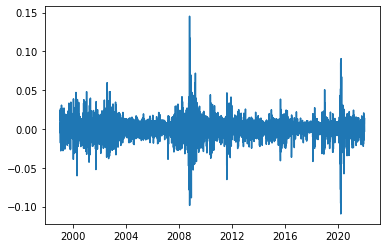

In [13]:
# Plot daily returns chart for exploration purposes
plt.plot(spy_returns.Close)
plt.show()

In [14]:
# Calculate the moving averages
spy_df['Fast_MA'] = spy_df.Close.rolling(window = fast_ma).mean()
spy_df['Slow_MA'] = spy_df.Close.rolling(window = slow_ma).mean()

# Observe the last values
spy_df.tail()

,Close,Fast_MA,Slow_MA
Date,,,
2021-12-23 16:00:00,470.60,461.7478,452.1361
2021-12-27 16:00:00,477.26,462.4430,452.5189
2021-12-28 16:00:00,476.87,463.0630,452.8700
2021-12-29 16:00:00,477.48,463.6688,453.2199
2021-12-30 16:00:00,476.16,464.1792,453.5602


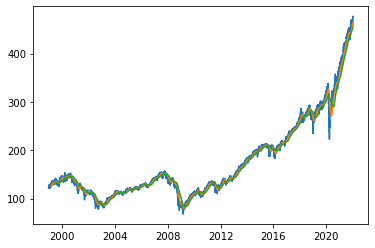

In [15]:
# Plot close values with the fast and slow moving averages
plt.plot(spy_df.Close)
plt.plot(spy_df.Fast_MA)
plt.plot(spy_df.Slow_MA)

plt.show()

In [16]:
# Define a function for plotting line charts. This function can be used for the different analysis cases.
def create_line_chart(close, short_rolling_spy, long_rolling_spy, short_label, long_label):
    """
    Create a line chart based in the close, short_rolling_spy, and long_rolling_spy arguments.
    """
    fig, ax = plt.subplots(figsize=(16,9))

    ax.plot(close.index, close, label='SPY price')
    ax.plot(short_rolling_spy.index, short_rolling_spy, label=short_label)
    ax.plot(long_rolling_spy.index, long_rolling_spy, label=long_label)

    ax.set_xlabel('Date')
    ax.set_ylabel('Adjusted closing price ($)')
    ax.legend()
    plt.close(fig)
    return fig

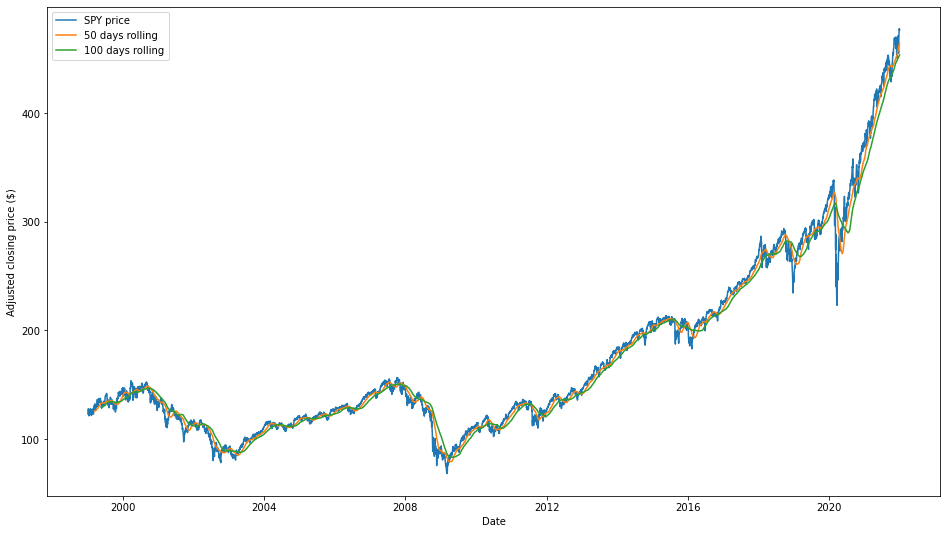

In [17]:
# Call the create_line_chart function for the 50SMA vs 100SMA
create_line_chart(spy_df.Close, spy_df.Fast_MA, spy_df.Slow_MA, '50 days rolling', '100 days rolling')